<a href="https://colab.research.google.com/github/AruntejaLonka/-Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

* Sex: male or female("M" or "F")
* Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous) Behavioral
* Is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.) Medical( history)
* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal) Medical(current)
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level (Continuous) Predict variable (desired target)
10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - DV

## **1.Setting the Stage**

### **Importing Libraries**




In [26]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [27]:
#copy the data set path
path  = "/content/drive/MyDrive/Data sets/data_cardiovascular_risk (1).csv"

# **Loading Dataset and Analysing**

In [28]:
df = pd.read_csv(path)

In [29]:
#analyzing first five rows
df.head()


,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [30]:
#analysing last five rows
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [31]:
#Identify different charachteristics of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [32]:
#Identify the size
df.shape

(3390, 17)

In [33]:
#Check the Statistical discription of numerical value in dataset
#Crunch the numbers   
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3390.0,1694.500000,978.753033,0.00,847.25,1694.50,2541.75,3389.0
age,3390.0,49.542183,8.592878,32.00,42.00,49.00,56.00,70.0
education,3303.0,1.970936,1.019081,1.00,1.00,2.00,3.00,4.0
cigsPerDay,3368.0,9.069477,11.879078,0.00,0.00,0.00,20.00,70.0
BPMeds,3346.0,0.029886,0.170299,0.00,0.00,0.00,0.00,1.0
prevalentStroke,3390.0,0.006490,0.080309,0.00,0.00,0.00,0.00,1.0
prevalentHyp,3390.0,0.315339,0.464719,0.00,0.00,0.00,1.00,1.0
diabetes,3390.0,0.025664,0.158153,0.00,0.00,0.00,0.00,1.0
totChol,3352.0,237.074284,45.247430,107.00,206.00,234.00,264.00,696.0
sysBP,3390.0,132.601180,22.292030,83.50,117.00,128.50,144.00,295.0


# **Missing/NULL Values Treatment**

## Looking for the lost souls
* Why look for the null values? - these unrecorded information might play a prominent role in our analysis by providing us with important answers to hidden questions, might even lead us towards false predicitons and sometimes may not even affect at all. So it's always a better practice to catch the lost souls before moving on.

* Few doubts that pop up in our analytical minds are...

  * How ubiquitous are the missing values?
  * Are they random?
  * Do they show a pattern?

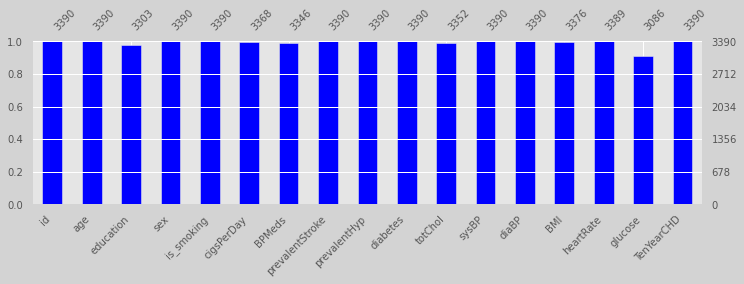

In [34]:
#Visualize the missing values
import missingno as msno
plt.figure(facecolor='lightgray')
msno.bar(df,color='blue',figsize=[12,3],fontsize=10)
plt.show()

## Moving on with the next steps, let's take a sneak peek at the count and percentages of the null values before we proceed further...

In [35]:
#Dig into the count and percentages
tot_missing = df.isnull().sum().sort_values(ascending=False)
percent_missing = (df.isnull().sum()* 100 / len(df)).round(2).sort_values(ascending=False)
lost_souls = pd.concat([tot_missing, percent_missing], axis=1, keys=['Total', 'Percentage'])
lost_souls.head(20)

,Total,Percentage
glucose,304,8.97
education,87,2.57
BPMeds,44,1.30
totChol,38,1.12
cigsPerDay,22,0.65
BMI,14,0.41
heartRate,1,0.03
id,0,0.00
diaBP,0,0.00
sysBP,0,0.00


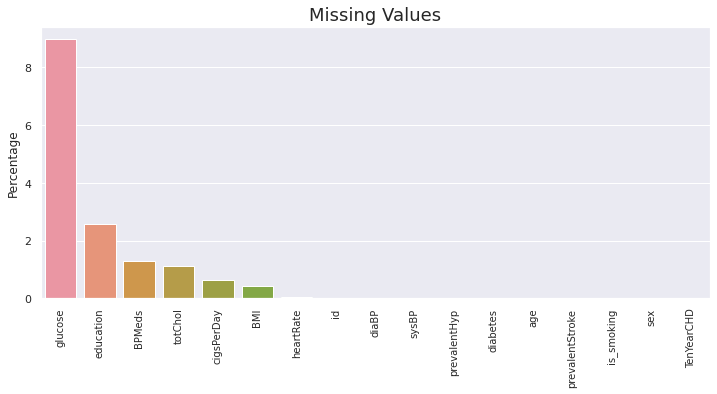

In [36]:
#Visualize the numbers
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(12,5)})

vis_missing = sns.barplot(x=lost_souls.index, y='Percentage', data=lost_souls)

vis_missing.set_title('Missing Values', fontsize = 18)
vis_missing.set_xticklabels(vis_missing.get_xmajorticklabels(), fontsize =10, rotation=90)
plt.show()

Mmmmm...magnificent! This reveals columns "glucose" , "education","BPMeds" , 'totChol', "cigsPerDay", and "BMI".
only need a quick replacement with the ever loving number '0' used when filling up the null values in data analysis. But before that let's get rid of the unwanted!

## Why remove them? 
Columns "id" is the irrelevant and insignificant to our data analysis since they will not provide crucial insights to our questions. Hence, we shall take our first move by removing them...

In [37]:
#Kick out the misfits
df.drop(['id'],axis=1,inplace=True)

In [38]:
#A quick look at the new results
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


Voila! Done and dusted! Removing the misfits have cleared the path to a better concise understanding of the dataset. What else is better than data that's not noisy!

But, One more step to go...

## Bringing in the most wanted!

In [39]:
#Shows the required data
list(df.columns)

['age',
 'education',
 'sex',
 'is_smoking',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'TenYearCHD']

Filling the rows which has higher than 5% null and lower than 30% null values

In [40]:
# Before making changes in the Data we have to amke a copy of it.
df_copy=df.copy()

In [41]:
#filling null values with 0
df_copy=df_copy.fillna(0)


In [42]:
#checking for null values
df_copy.isna().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [43]:
#Check the full info of data
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3390 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3390 non-null   float64
 5   BPMeds           3390 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3390 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3390 non-null   float64
 13  heartRate        3390 non-null   float64
 14  glucose          3390 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


###Target Variable

In [44]:
df_copy['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

# **Explanatory Data Analysis**

In [45]:
#Storing all the features which has continuous values
continuous_variables = ['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

In [47]:
other_variables = ['education','sex','is_smoking','prevalentStroke','prevalentHyp','diabetes']

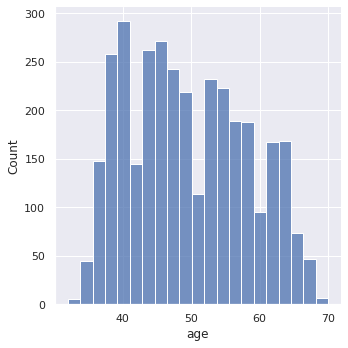

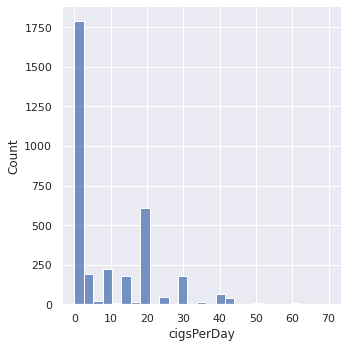

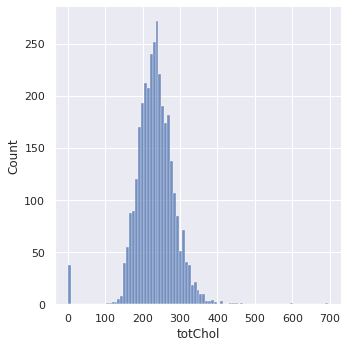

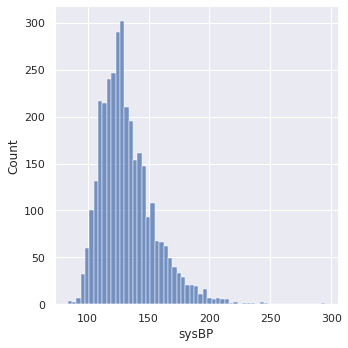

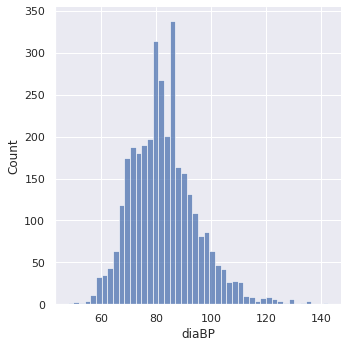

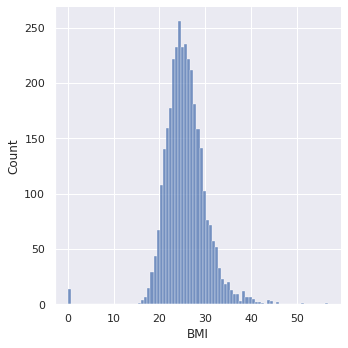

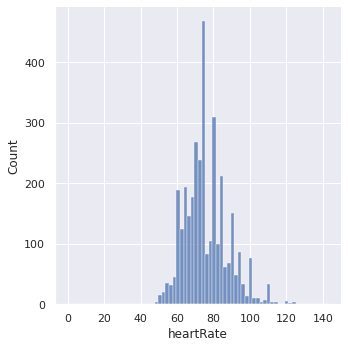

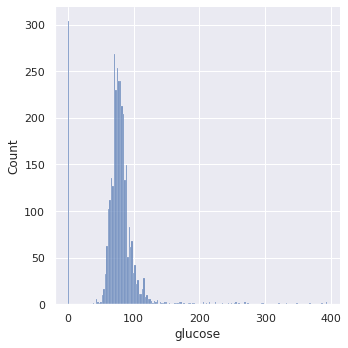

In [49]:
#Analyzing the distribution of all the features which has continuous values
for col in continuous_variables:
  sns.displot(df_copy[col])
plt.show()

**Age**

In [46]:
df_copy['age'].value_counts()

40    148
42    145
41    144
46    140
39    139
44    135
48    134
45    131
43    127
38    119
52    118
55    116
50    115
53    114
51    114
47    108
54    107
49    104
57     97
58     95
60     95
63     93
59     93
56     92
61     87
62     80
64     75
36     75
37     73
65     43
67     33
66     30
35     29
34     16
68     14
69      5
33      4
70      2
32      1
Name: age, dtype: int64

In [ ]:
fig = plt.bar(df_copy)

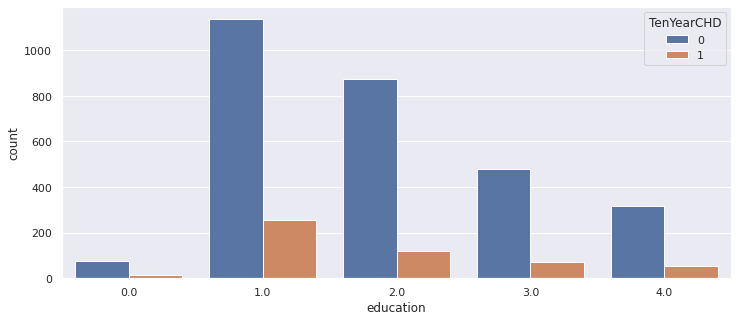

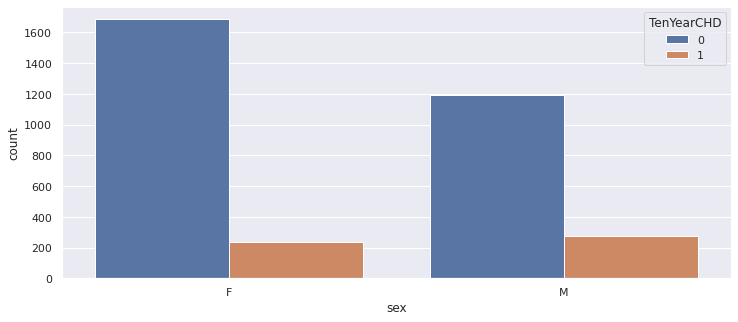

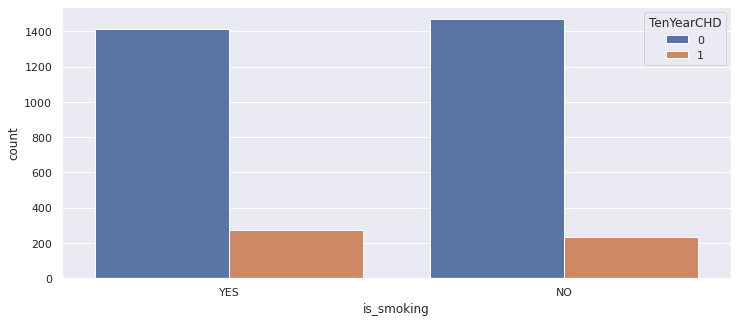

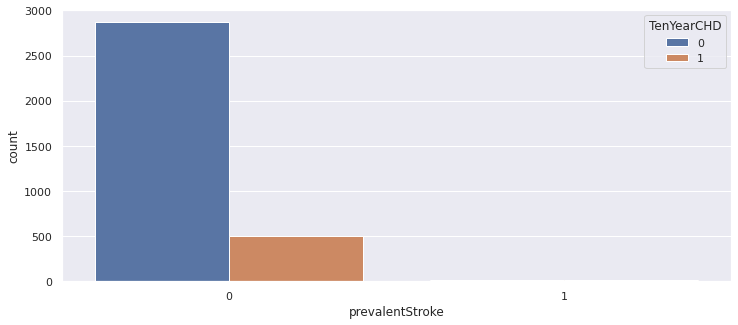

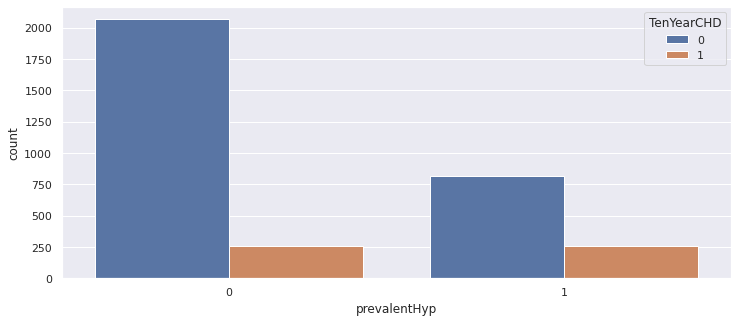

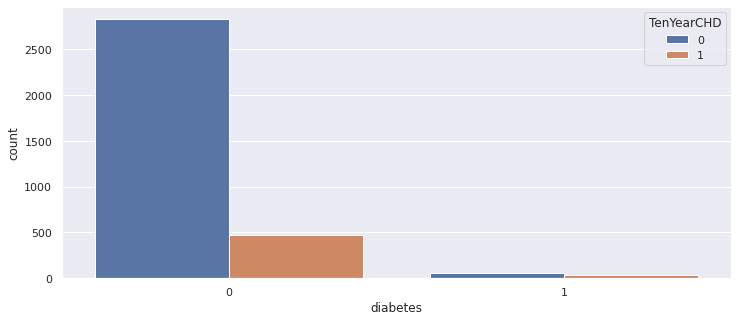

In [53]:
#Counting all the encoded values where dependent variable is the parameter
for col in other_variables:
  sns.countplot(x=df_copy[col],hue=df['TenYearCHD'],data=df_copy)
  plt.show()

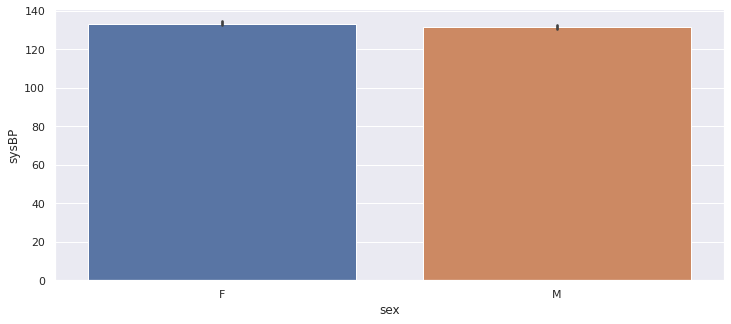

In [54]:
#sysBP varying amomng the genders
sns.barplot(x=df_copy['sex'],y=df_copy['sysBP'],data=df_copy)

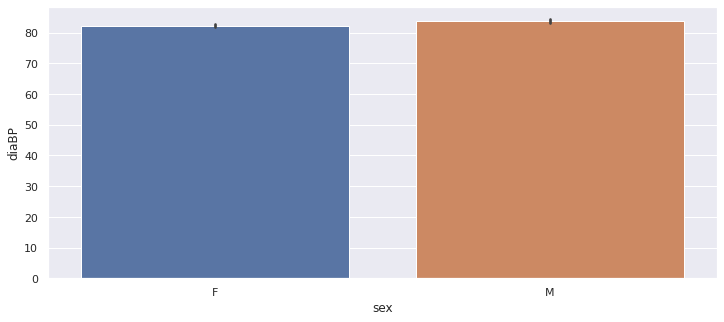

In [55]:
#diaBP varying among the genders
sns.barplot(x=df_copy['sex'],y=df_copy['diaBP'],data=df_copy)

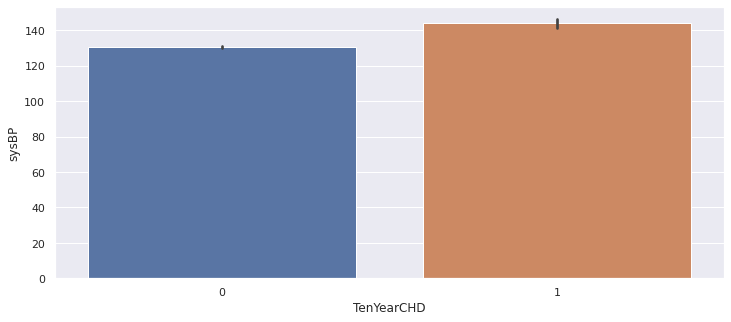

In [56]:
#sysBP of a person who is at risk and who isn't
sns.barplot(x=df['TenYearCHD'],y=df['sysBP'],data=df)

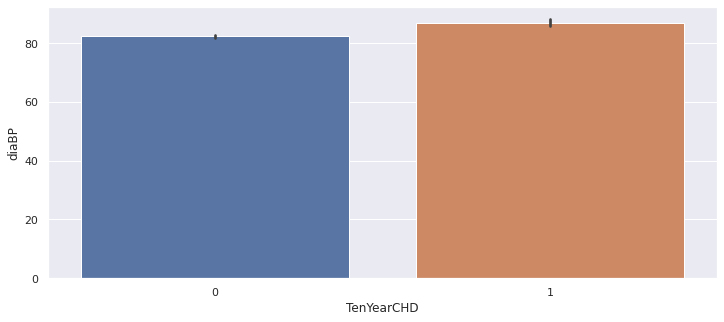

In [57]:
#diaBP of a person who is at risk and who isn't
sns.barplot(x=df['TenYearCHD'],y=df['diaBP'],data=df)

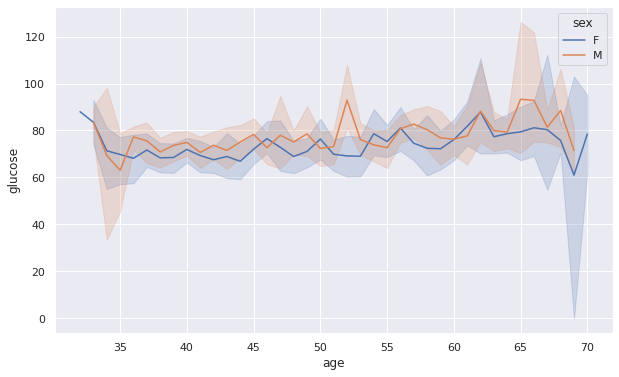

In [60]:
#Finding When a person gets old how much their glucose level varies
plt.figure(figsize=(10,6))
sns.lineplot(x=df_copy['age'],y=df_copy['glucose'],hue=df_copy['sex'],data=df_copy)

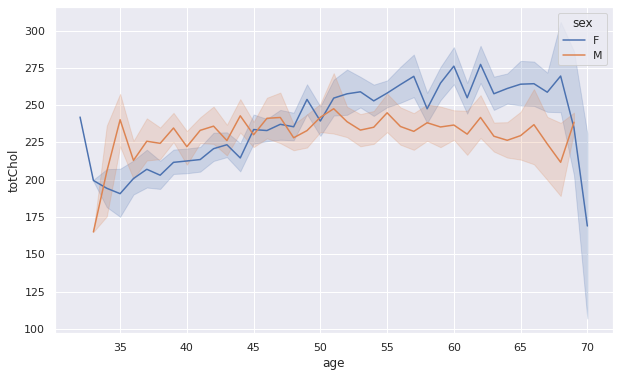

In [61]:
#Finding when a person gets old how much Cholestrol level varies
plt.figure(figsize=(10,6))
sns.lineplot(x=df['age'],y=df['totChol'],hue=df['sex'],data=df)

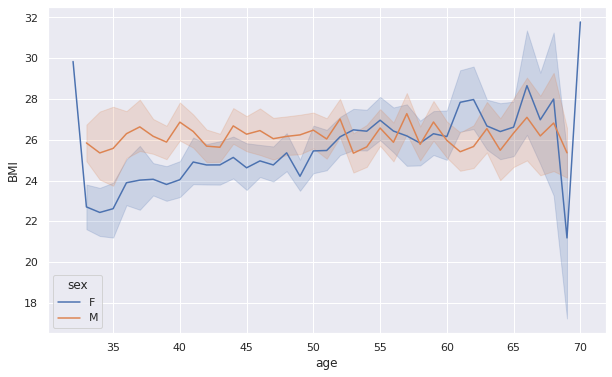

In [62]:
#Finding when a person gets old how much their BMI level varies
plt.figure(figsize=(10,6))
sns.lineplot(x=df['age'],y=df['BMI'],hue=df['sex'],data=df)

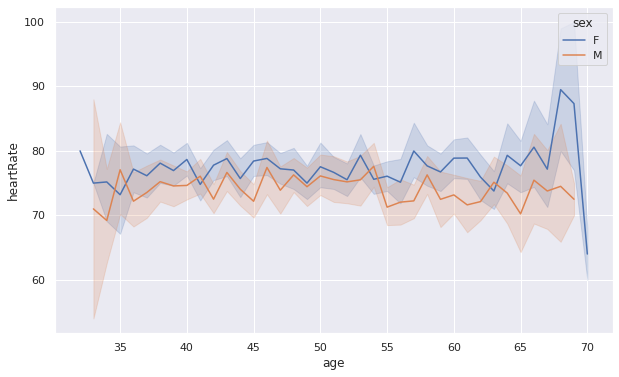

In [63]:
#Finding when a person gets old how much their heart rate level varies
plt.figure(figsize=(10,6))
sns.lineplot(x=df['age'],y=df['heartRate'],hue=df['sex'],data=df)

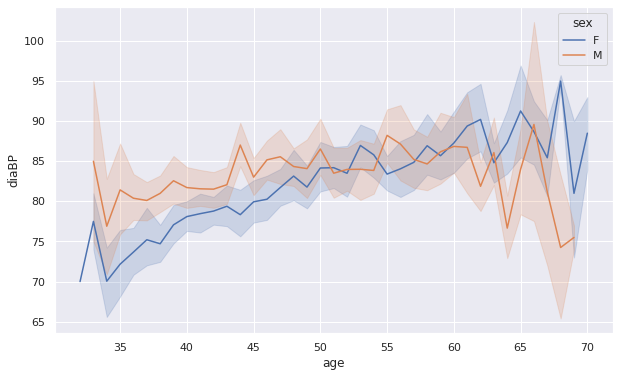

In [64]:
#Finding when a person gets old how much their diaBP level varies
plt.figure(figsize=(10,6))
sns.lineplot(x=df['age'],y=df['diaBP'],hue=df['sex'],data=df)

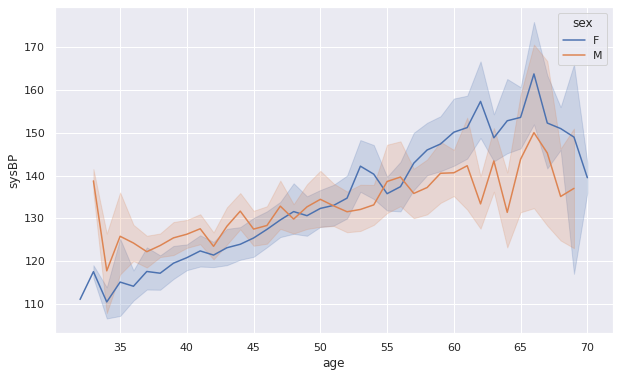

In [65]:
#Finding when a person gets old how much their sysBP level varies
plt.figure(figsize=(10,6))
sns.lineplot(x=df['age'],y=df['sysBP'],hue=df['sex'],data=df)

# Handling Outliers

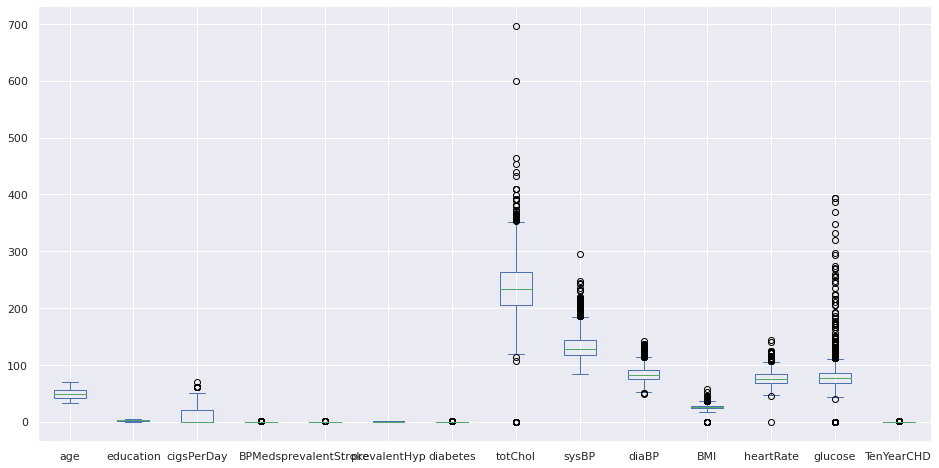

In [67]:
#Box Plot for analyzing the outliers
df_copy.plot(kind='box',figsize=(16,8))

In [68]:
#Stored all the features where we want to remove outliers
outlier_col = ['cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

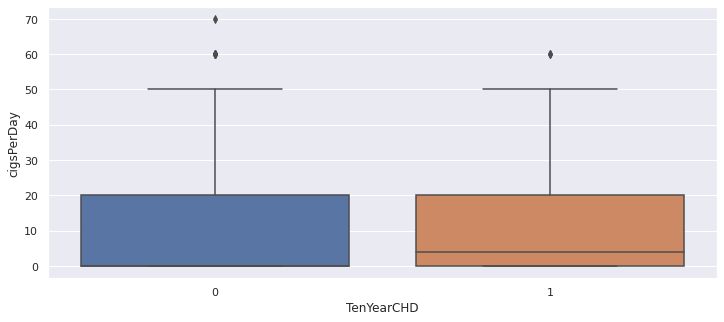

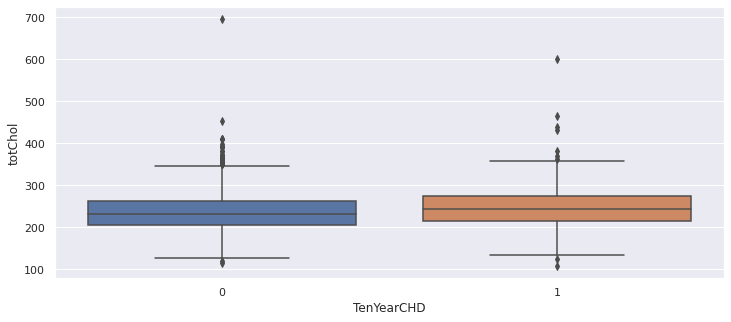

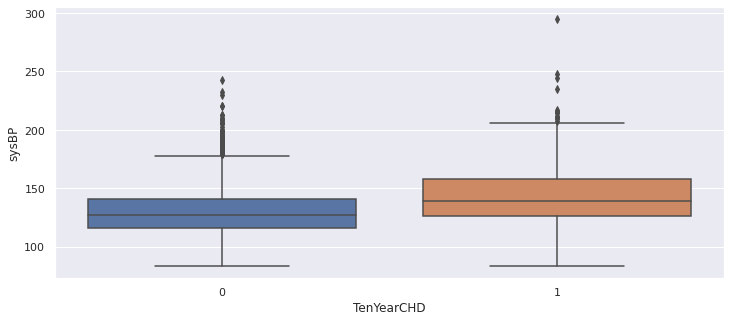

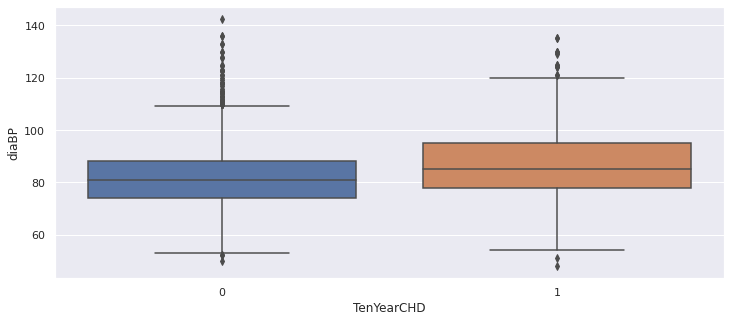

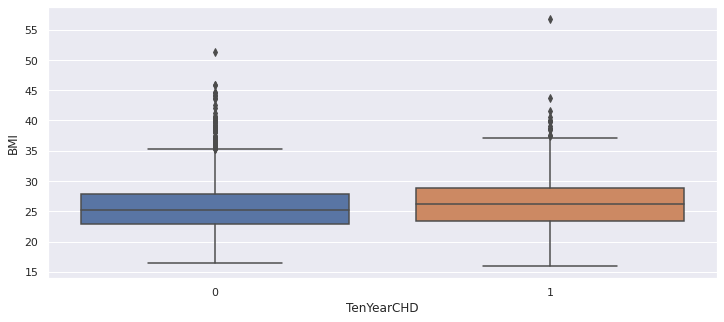

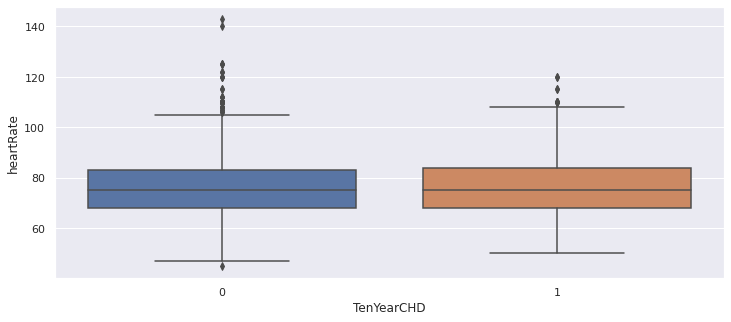

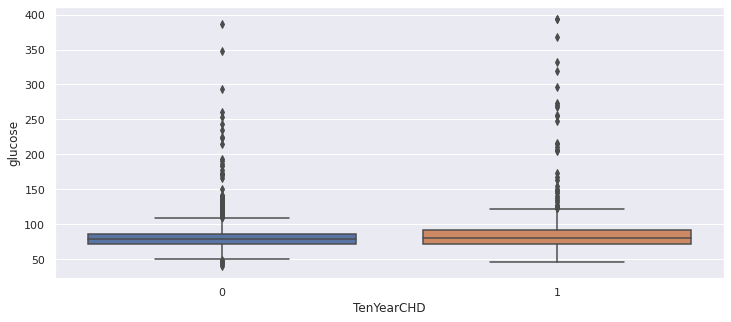

In [69]:
#Analyzing the outlier columns
for col in outlier_col:
  sns.boxplot(x=df['TenYearCHD'],y=df[col],data=df)
  plt.show()

In [70]:
#Handling Outliers
df[outlier_col]=df[outlier_col].clip(lower=df[outlier_col].quantile(0.15),upper=df[outlier_col].quantile(0.85),axis=1)

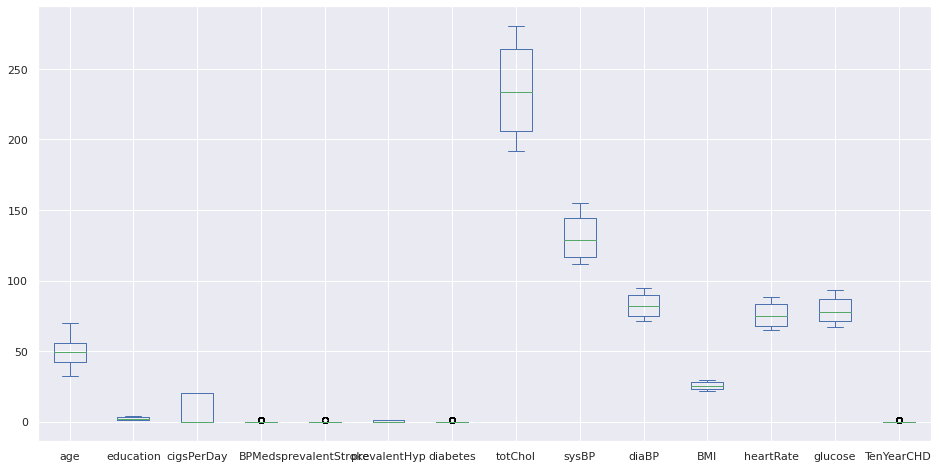

In [71]:
#Box plot after handling outliers
df.plot(kind='box',figsize=(16,8))

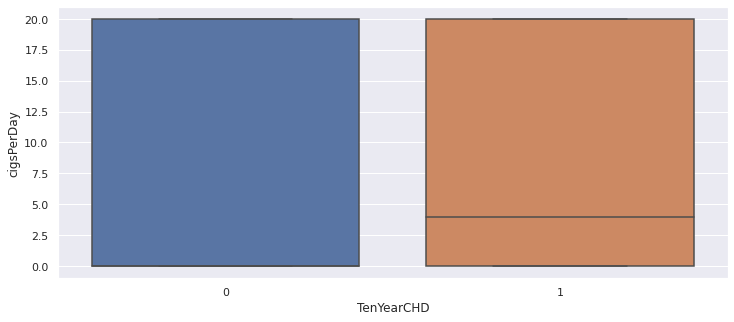

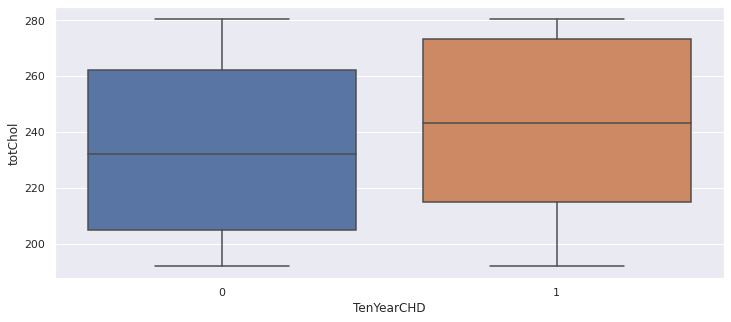

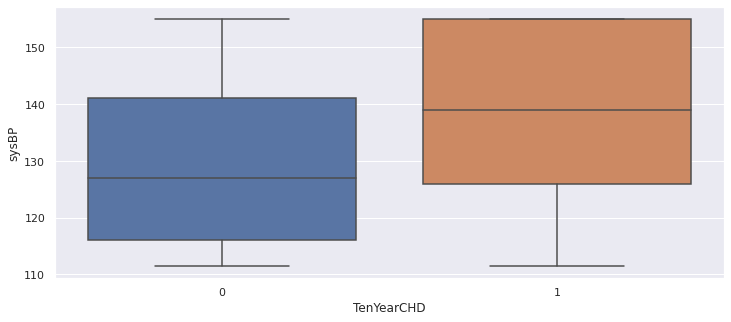

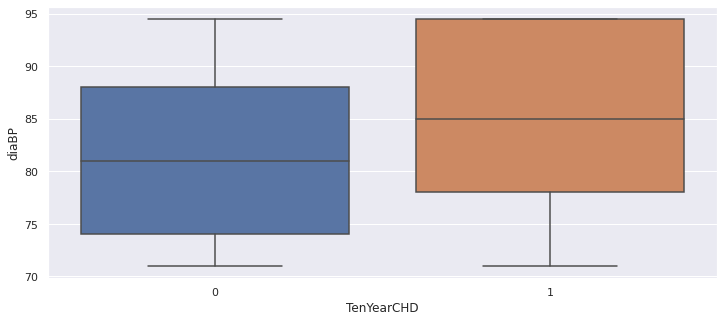

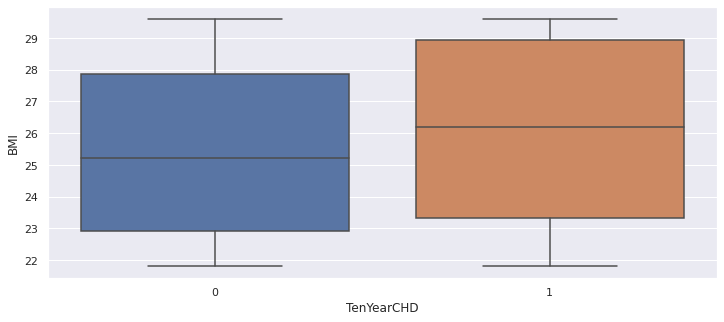

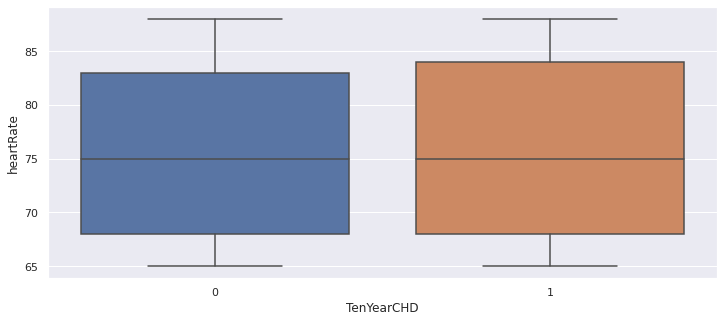

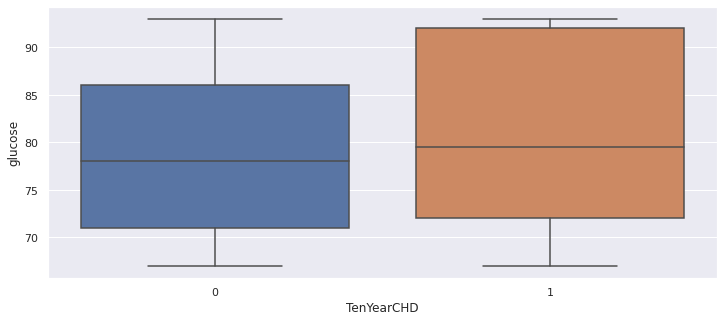

In [72]:
for col in outlier_col:
  sns.boxplot(x=df['TenYearCHD'],y=df[col],data=df)
  plt.show()

# Multicollinearity

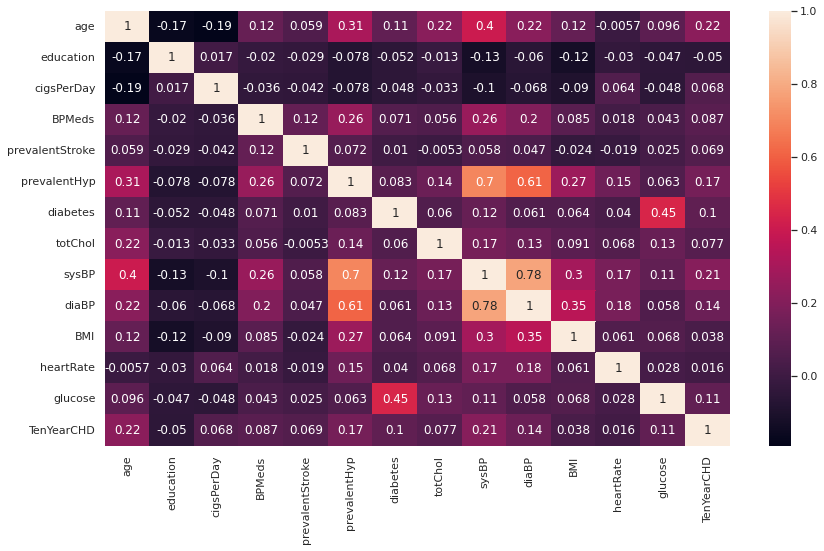

In [73]:
# Heatmap:
plt.figure(figsize=(14,8))
sns.heatmap(df_copy.corr(),annot=True)

In [74]:
# Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [75]:
calc_vif(df_copy[[i for i in df_copy.describe().columns ]])

,variables,VIF
0,age,39.557400
1,education,4.226936
2,cigsPerDay,1.642276
3,BPMeds,1.131159
4,prevalentStroke,1.031052
5,prevalentHyp,2.362192
6,diabetes,1.292176
7,totChol,22.834471
8,sysBP,132.993532
9,diaBP,127.792557


sysBp means systolic blood pressure and diaBP means diastolic blood pressure are correalted to eaach other but we cannot drop these columns as 
Blood pressure is measured using two numbers: The first number, called systolic blood pressure, measures the pressure in your arteries when your heart beats. The second number, called diastolic blood pressure, measures the pressure in your arteries when your heart rests between beats.

# Label Encoding

In [76]:
#Mapping the Variables
df_copy['is_smoking']=df_copy['is_smoking'].map({'YES':1,'NO':0})
df_copy['sex']=df_copy['sex'].map({'M':0,'F':1})

In [77]:
df.head(2)

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,88.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,155.0,94.5,29.5975,72.0,75.0,0


# Feature Selection

In [78]:
X = df_copy.iloc[:,0:-1].values
y=df_copy['TenYearCHD'].values

In [79]:
X

array([[64.  ,  2.  ,  1.  , ...,  0.  , 90.  , 80.  ],
       [36.  ,  4.  ,  0.  , ..., 29.77, 72.  , 75.  ],
       [46.  ,  1.  ,  1.  , ..., 20.35, 88.  , 94.  ],
       ...,
       [44.  ,  3.  ,  0.  , ..., 28.92, 73.  , 72.  ],
       [60.  ,  1.  ,  0.  , ..., 23.01, 80.  , 85.  ],
       [54.  ,  3.  ,  1.  , ..., 29.88, 79.  , 92.  ]])

In [80]:
y

array([1, 0, 0, ..., 1, 0, 0])

In [81]:
X.shape,y.shape

((3390, 15), (3390,))

# Splitting & Scaling data

In [84]:
#Splitting the data into training and testing dataset
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.25, random_state = 0) 

In [85]:
#Checking the shape of our training and testing datasets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2542, 15)
(848, 15)
(2542,)
(848,)


In [86]:
#Using Standard Scaler to scale 
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test) 

# Implementing Logistic Regression

In [87]:
from sklearn.linear_model import LogisticRegression
Log = LogisticRegression()

In [89]:
#Fitting the training datasets
Log.fit(X_train,y_train)

LogisticRegression()

In [90]:
#predicting on training dataset
y_pred_log_train = Log.predict(X_train)

In [91]:
#predicting on testing dataset
y_pred_log_test = Log.predict(X_test)

## Classification Evaluation Metrics on Logistic Regression.

In [92]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [93]:
#Accuracy score of training
log_acc_train = accuracy_score(y_train,y_pred_log_train)*100
log_acc_train

85.99527930763179

In [94]:
#Confusion Metrics of training
cm_log_train = confusion_matrix(y_train,y_pred_log_train)
cm_log_train

array([[2141,   20],
       [ 336,   45]])

In [95]:
#Confusion Metrics of testing
cm_log_test = confusion_matrix(y_test,y_pred_log_test)
cm_log_test

array([[708,  10],
       [121,   9]])

In [96]:
#Classification Report of training
print(classification_report(y_train,y_pred_log_train))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2161
           1       0.69      0.12      0.20       381

    accuracy                           0.86      2542
   macro avg       0.78      0.55      0.56      2542
weighted avg       0.84      0.86      0.82      2542



In [97]:
#Classification report of testing
print(classification_report(y_test,y_pred_log_test))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       718
           1       0.47      0.07      0.12       130

    accuracy                           0.85       848
   macro avg       0.66      0.53      0.52       848
weighted avg       0.80      0.85      0.79       848



AS our data is highly imbalance so we have to improve this

# Using Smotek Technique

In [98]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [99]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_resample(X,y)

In [100]:
X_res.shape,y_res.shape,X.shape,y.shape

((5708, 15), (5708,), (3390, 15), (3390,))

##Splitting & scaling data after Smotek Technique

In [101]:
#Splitting the data
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size = 0.20, random_state=0)

In [102]:
X_train_res.shape,y_train_res.shape

((4566, 15), (4566,))

In [103]:
#Scaling the data
X_train_res = scaler.fit_transform(X_train_res)
X_test_res = scaler.transform(X_test_res)

In [104]:
X_train_res.shape,y_train_res.shape

((4566, 15), (4566,))

In [ ]:
# Implementing Logistic Regression after using Smotek Technique

# Implementing Logistic Regression after using Smotek Technique

In [105]:
model_smotek = LogisticRegression()

In [106]:
model_smotek.fit(X_train_res,y_train_res)

LogisticRegression()

## Classification Evaluation Metrics on Logistic Regression after using Logistic Regression

In [107]:
y_pred_smotek_train = model_smotek.predict(X_train_res) 

In [108]:
y_pred_smotek_test = model_smotek.predict(X_test_res) 

In [109]:
#Accuaracy score of training
log_acc_train = accuracy_score(y_train_res,y_pred_smotek_train)*100
log_acc_train

67.47700394218134

In [110]:
#Confusion Matrix of training
confusion_matrix(y_train_res,y_pred_smotek_train)

array([[1505,  763],
       [ 722, 1576]])

In [111]:
#Classification report of training
print(classification_report(y_train_res,y_pred_smotek_train))

              precision    recall  f1-score   support

           0       0.68      0.66      0.67      2268
           1       0.67      0.69      0.68      2298

    accuracy                           0.67      4566
   macro avg       0.67      0.67      0.67      4566
weighted avg       0.67      0.67      0.67      4566



In [112]:
#Accuaracy score of testing
log_acc_test = accuracy_score(y_test_res,y_pred_smotek_test)*100
log_acc_test

65.8493870402802

In [113]:
#Confusion Matrix of testing
confusion_matrix(y_test_res,y_pred_smotek_test)

array([[378, 208],
       [182, 374]])

In [114]:
#Classification report of testing
print(classification_report(y_test_res,y_pred_smotek_test))

              precision    recall  f1-score   support

           0       0.68      0.65      0.66       586
           1       0.64      0.67      0.66       556

    accuracy                           0.66      1142
   macro avg       0.66      0.66      0.66      1142
weighted avg       0.66      0.66      0.66      1142



# **RANDOM FOREST**

In [115]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier() # For GBM, use GradientBoostingClassifier()
grid_values = {'n_estimators':[50, 65, 80, 95,120], 'max_depth':[3, 5, 7,9,12]}
GSclassifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5)

# Fit the object to train dataset
GSclassifier.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9, 12],
                         'n_estimators': [50, 65, 80, 95, 120]},
             scoring='roc_auc')

In [116]:
bestvalues=GSclassifier.best_params_
GSclassifier.best_params_

{'max_depth': 3, 'n_estimators': 65}

In [117]:
classifier = RandomForestClassifier(max_depth=bestvalues['max_depth'],n_estimators=bestvalues['n_estimators']) # For GBM, use GradientBoostingClassifier()

classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=65)

In [118]:
y_train_preds_rf =  classifier.predict(X_train)
y_test_preds_rf= classifier.predict(X_test)

In [127]:
# Obtain accuracy on train set
accuracy_score(y_train,y_train_preds_rf)

0.8528717545239969

In [120]:
# Obtain accuracy on test set
accuracy_score(y_test,y_test_preds_rf)

0.8455188679245284

In [121]:
y_rf_predict_pro=classifier.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_rf_predict_pro)

In [129]:
#Accuracy score, confusion matrix and classification report of training 
rfc_acc_train = accuracy_score(y_train,y_train_preds_rf)*100
print(rfc_acc_train)
print(confusion_matrix(y_train,y_train_preds_rf))
print(classification_report(y_train,y_train_preds_rf))

85.2871754523997
[[2161    0]
 [ 374    7]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2161
           1       1.00      0.02      0.04       381

    accuracy                           0.85      2542
   macro avg       0.93      0.51      0.48      2542
weighted avg       0.87      0.85      0.79      2542



In [131]:
#Accuracy score, confusion matrix and classification report of testing
rfc_acc_test = accuracy_score(y_test,y_test_preds_rf)*100
print(rfc_acc_test)
print(confusion_matrix(y_test,y_test_preds_rf))
print(classification_report(y_test,y_test_preds_rf))

84.55188679245283
[[717   1]
 [130   0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       718
           1       0.00      0.00      0.00       130

    accuracy                           0.85       848
   macro avg       0.42      0.50      0.46       848
weighted avg       0.72      0.85      0.78       848



In [122]:
roc_auc_score(y_test,y_rf_predict_pro)

0.6701949860724234

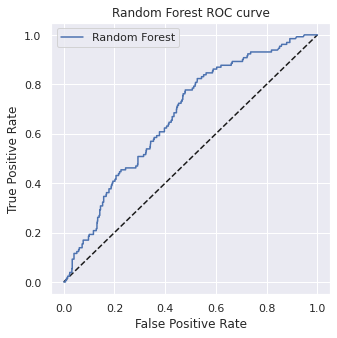

In [123]:
plt.figure(figsize=(5,5))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_rf,tpr_rf, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC curve')
plt.legend()
plt.show()